# HW3 Problem 3 #

3) Experimentally, one could try to measure the rate of ring-closing by making the ring-opened  species  (e.g.  by  flash  photolysis  of  hexenyl  iodide,  forms  the  hexen-6-yl  radical instantaneously at t=0) and trapping that acylic species, e.g. by adding NO and analyzing for the acyclic  nitroso  product  species.   (NO  reacts  very  quickly  with  most  radicals  to  form stable nitroso compounds, k~1e13 cm3/mole-s).    The competing reactions are: 

CH2=CHCH2CH2CH2CH2 = cyclohexyl radical          

CH2=CHCH2CH2CH2CH2 + NO = CH2=CHCH2CH2CH2CH2NO

Approximately  what  partial pressure  of  NO  would  be  required  to  trap  1%  of  the  ring-opened species hexen-6-yl before they ring-closed at 500 K?

In [59]:
# add appropriate modules
import pandas as pd
import numpy as np
import time
import cantera as ct
from matplotlib import pyplot as plt
import csv
import math
from operator import add

from IPython.display import Image

By the calculations below, it appears that an initial mole fraction of 0.01 (Partial Pressure  for NO ~ 510 Pa) captures 1% of the straight chain species


['He', 'C6H11R', 'C6H11', 'NO', 'C6H11NO']


Text(0, 0.5, 'C6H11NO final mole Fraction')

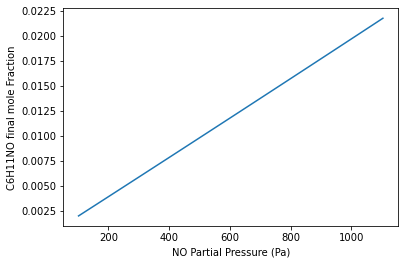

In [75]:
# Equilibrium calcs 
cti_file = '/Users/blais.ch/_01_code/MIT_Kinetics_HW/assignments/HW3/P3/Thermo.cti'
gas = ct.Solution(cti_file)

# Reactor conditions
reactorTemperature = 500  # Kelvin
reactorPressure = ct.one_atm 
concentrations = {'NO': 0.5, 'C6H11': 0.5}
gas.TPX = reactorTemperature, reactorPressure, concentrations 
ratio = []
equilib = []
NOconcs=testlist = np.arange(0.001, 0.011, 0.0001).tolist()
P_NO = []
C6H11concs = []
for i in range(len(NOconcs)):
    P_NO.append(NOconcs[i]*reactorPressure)
    C6H11concs.append(1-NOconcs[i])
    

ROSpeciesX = []

print(gas.species_names)
for i in range(len(NOconcs)):
    concentrations = {'NO': NOconcs[i], 'C6H11': C6H11concs[i]}
    gas.TPX = reactorTemperature, reactorPressure, concentrations
    gas.equilibrate('TP')
    ratio.append(gas.X[4]/0.5)
    ROSpeciesX.append(gas.X[4])
    equilib.append(gas.equilibrium_constants[1])
#     print('Partial Pressure NO start',':', P_NO[i], 'mole ratio of C6H11 to nitroso product: ', ratio[i])
#     print(gas.X)



plt.plot(P_NO, ratio)
plt.xlabel('NO Partial Pressure (Pa)')
plt.ylabel('C6H11NO final mole Fraction')